# DATS 2102 – Week 2: Language of Graphs
## Session 2 Hands‑On: Seaborn (Categorical vs Continuous) + Altair (Grammar of Graphics)

**Learning objectives**
- Apply **tidy data** reshaping to prepare data for plotting
- Load the Gapminder dataset and perform a quick EDA
- Use **Seaborn** for categorical vs. continuous plots
- Use **Altair** for a declarative grammar of graphics and interactivity
- Practice **multiple encodings** (color, size, shape) and reflect on readability

### 1) Setup
pip install pandas numpy matplotlib seaborn altair plotly


In [1]:
import seaborn as sns
import pandas as pd

### 2) Tidy Reshaping (pd.melt)
**Demo** for converting messy data/dataframe into tidy data/dataframe
Please refer to the details of the pandas melt function here: https://pandas.pydata.org/docs/reference/api/pandas.melt.html  

In [2]:
messy_data = pd.DataFrame({
    "Country": ["USA", "China", "UK"],
    "2000": [280, 1260, 59],
    "2005": [295, 1320, 60],
    "2010": [310, 1390, 63]
})

display(messy_data)
print(messy_data)
messy_data

,Country,2000,2005,2010
0,USA,280,295,310
1,China,1260,1320,1390
2,UK,59,60,63


  Country  2000  2005  2010
0     USA   280   295   310
1   China  1260  1320  1390
2      UK    59    60    63


,Country,2000,2005,2010
0,USA,280,295,310
1,China,1260,1320,1390
2,UK,59,60,63


In [3]:
tidy_data = messy_data.melt(id_vars='Country', value_vars=['2000', '2005','2010'], var_name='Year', value_name='Population')

##make a tiny wide table and reshape it to long
tidy_data['Year'] = tidy_data['Year'].astype(int)

tidy_data

,Country,Year,Population
0,USA,2000,280
1,China,2000,1260
2,UK,2000,59
3,USA,2005,295
4,China,2005,1320
5,UK,2005,60
6,USA,2010,310
7,China,2010,1390
8,UK,2010,63


**One more example**

In [4]:
df_wide = pd.DataFrame({
'name': ['Alice', 'Bob'],
'math': [90, 80],
'english': [85, 78]
})

In [5]:
df_tidy = df_wide.melt(id_vars='name', var_name='subject', value_name='score')

# Load Gapminder dataset
**We can use the one from Plotly's GitHub for this session**
https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv

In [6]:
##load the dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
gapminder = pd.read_csv(url)

gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


### 3) Quick EDA

In [7]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [8]:
gapminder.describe(include='all').T.head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,1704,142,Afghanistan,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1704.0,NaN,NaN,NaN,1979.5,17.26533,1952.0,1965.75,1979.5,1993.25,2007.0
pop,1704.0,NaN,NaN,NaN,29601212.325117,106157896.746828,60011.0,2793664.0,7023595.5,19585221.75,1318683096.0
continent,1704,5,Africa,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lifeExp,1704.0,NaN,NaN,NaN,59.474439,12.917107,23.599,48.198,60.7125,70.8455,82.603
gdpPercap,1704.0,NaN,NaN,NaN,7215.327081,9857.454543,241.165876,1202.060309,3531.846988,9325.462346,113523.1329


In [9]:
sorted(gapminder['year'].unique())[:10], gapminder['continent'].unique()

([np.int64(1952),
  np.int64(1957),
  np.int64(1962),
  np.int64(1967),
  np.int64(1972),
  np.int64(1977),
  np.int64(1982),
  np.int64(1987),
  np.int64(1992),
  np.int64(1997)],
 array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object))

### 4) Seaborn: Categorical vs Continuous

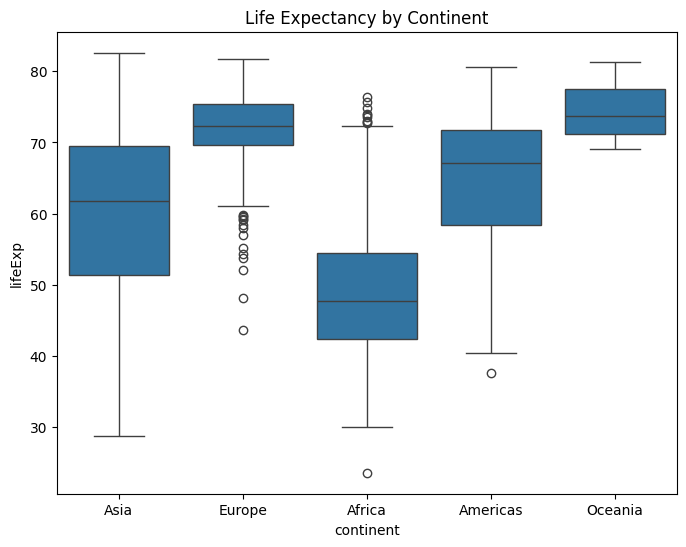

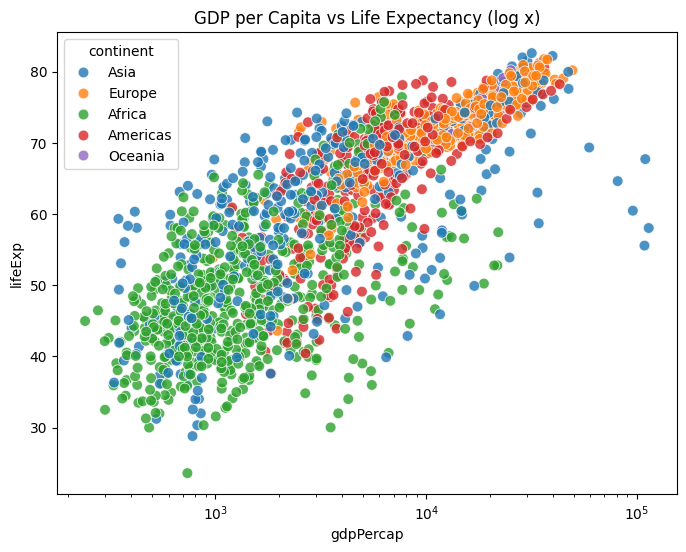

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

# Categorical example: life expectancy by continent (boxplot)
plt.figure(figsize=(8,6))
sns.boxplot(x="continent", y="lifeExp", data=gapminder)
plt.title("Life Expectancy by Continent")
plt.show()

# Continuous example: GDP vs Life Expectancy (scatter; hue = continent)
plt.figure(figsize=(8,6))
sns.scatterplot(x="gdpPercap", y="lifeExp", hue="continent", data=gapminder, s=60, alpha=0.8)
plt.xscale("log")
plt.title("GDP per Capita vs Life Expectancy (log x)")
plt.show()


### 5) Seaborn: Multiple Encodings

**Example 1**

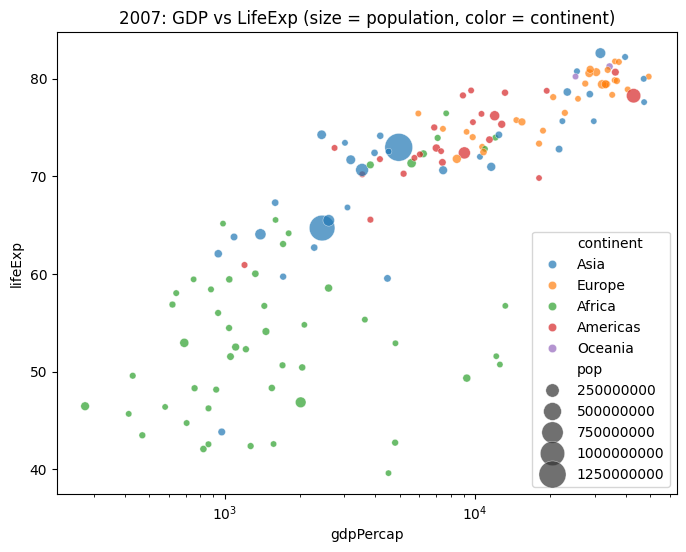

In [11]:
# Use size to encode population; hue for continent
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="gdpPercap", y="lifeExp",
    size="pop", hue="continent",
    data=gapminder[gapminder['year']==2007],
    sizes=(20, 400), alpha=0.7
)
plt.xscale("log")
plt.title("2007: GDP vs LifeExp (size = population, color = continent)")
plt.show()

**Example 2**

In [12]:
# Load tips dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

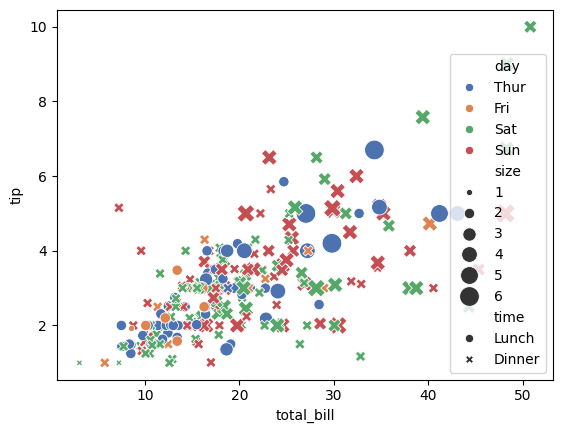

In [13]:
sns.scatterplot(data=tips,x="total_bill", 
                y="tip",
                hue="day", 
                style="time", 
                size="size", 
                palette="deep", 
                sizes=(20, 200))

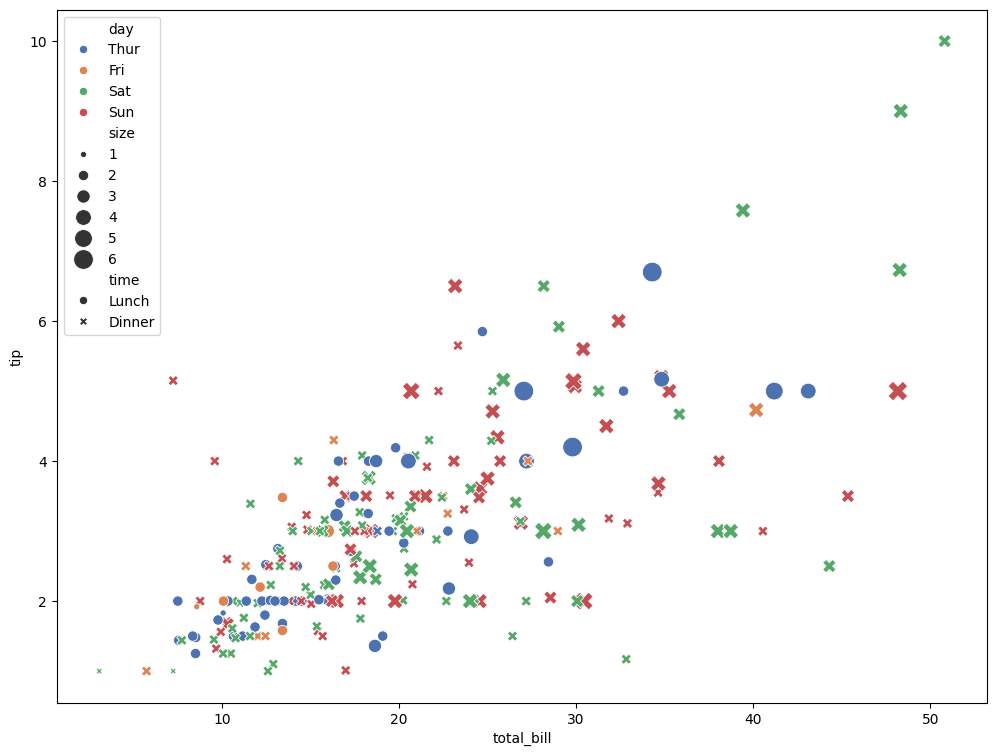

In [14]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=tips,x="total_bill", 
                y="tip",
                hue="day", 
                style="time", 
                size="size", 
                palette="deep", 
                sizes=(20, 200))
# plt.xscale("log")
plt.show()

### 6) Altair: Grammar of Graphics + Interactivity

In [15]:
import altair as alt

alt.Chart(gapminder).mark_circle().encode(
    x='gdpPercap:Q',
    y='lifeExp:Q',
    color='continent:N',
    size='pop:Q',
    tooltip=['country','year','lifeExp','gdpPercap']
).interactive()


alt.Chart(...)

In [16]:
import altair as alt

# Make charts renderable in notebooks
alt.data_transformers.disable_max_rows()

base = alt.Chart(gapminder).mark_circle().encode(
    x=alt.X('gdpPercap:Q', scale=alt.Scale(type='log')),
    y='lifeExp:Q',
    color='continent:N',
    size=alt.Size('pop:Q', title='Population'),
    tooltip=['country:N','continent:N','year:O','lifeExp:Q','gdpPercap:Q','pop:Q']
).properties(width=600, height=480)

base.interactive()

alt.Chart(...)

## Altair's Grammar of Graphics

Altair Type Shorthands

Each variable you encode in Altair must declare its data type. There are four main types:

Q = Quantitative

Numeric, continuous values (GDP, population, life expectancy)

Example: x='gdpPercap:Q' → treat GDP per capita as a number with a continuous scale.

N = Nominal

Categorical, unordered labels (continent, country names, gender)

Example: color='continent:N' → treat continent as categories, map to distinct colors.

O = Ordinal

Ordered categories (education levels, small/medium/large, survey responses 1–5)

Example: x='year:O' if you want to treat years as ordered categories instead of continuous.

T = Temporal

Time/date values (year, month, datetime)

Example: x='year:T' → treat year as a time axis.

#### Altair Selections (Brush + Filter)

In [17]:

brush = alt.selection_interval(encodings=['x','y'])

points = alt.Chart(gapminder).mark_point().encode(
    x=alt.X('gdpPercap:Q', scale=alt.Scale(type='log'), title='GDP per Capita (log)'),
    y=alt.Y('lifeExp:Q', title='Life Expectancy'),
    color=alt.condition(brush, 'continent:N', alt.value('lightgray')),
    tooltip=['country','year','lifeExp','gdpPercap','pop']
).add_params(brush).properties(width=350, height=280)

hist = alt.Chart(gapminder).mark_bar().encode(
    x=alt.X('lifeExp:Q', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='continent:N'
).transform_filter(brush).properties(width=350, height=280)

(points | hist)

alt.HConcatChart(...)

### 7) Guided Exercise 
Create a chart with **multiple encodings** using `gapminder[gapminder['year'] == 2007]`:
- x = GDP per capita (log)
- y = Life expectancy
- color = continent
- size = population

**Questions to reflect on:**
- Which encoding contributes most to readability?
- Is any encoding redundant or distracting?
- Try swapping encodings (e.g., shape for continent, size for GDP).

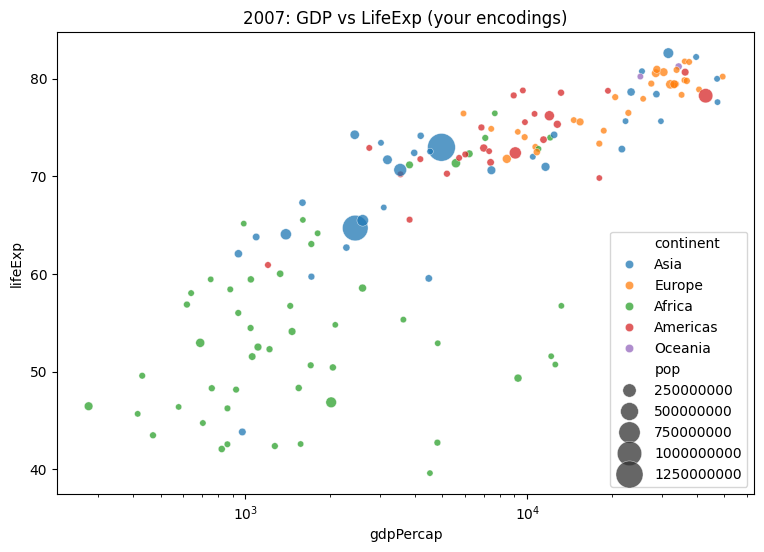

In [18]:

year_df = gapminder[gapminder['year'] == 2007].copy()

# TODO: your plot here (Seaborn or Altair)
# Example scaffold (Seaborn):
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
sns.scatterplot(
    x="gdpPercap", y="lifeExp",
    hue="continent", size="pop",
    data=year_df, sizes=(20, 400), alpha=0.75
)
plt.xscale("log")
plt.title("2007: GDP vs LifeExp (your encodings)")
plt.show()

### 8) Challenges 1
- Starting from `gapminder`, compute the **top 10 countries by GDP per capita** in 2007.
- Make an Altair bar chart with tooltips.
- Then switch to Seaborn and try a horizontal bar chart.
- Reflect: which was faster to write and more readable?

In [19]:

top10_2007 = (
    gapminder[gapminder['year']==2007]
    .nlargest(10, 'gdpPercap')
    .sort_values('gdpPercap')
)
top10_2007[['country','continent','gdpPercap']].head()


,country,continent,gdpPercap
695,Iceland,Europe,36180.78919
251,Canada,Americas,36319.23501
1091,Netherlands,Europe,36797.93332
1487,Switzerland,Europe,37506.41907
671,"Hong Kong, China",Asia,39724.97867


In [20]:

import altair as alt
alt.Chart(top10_2007).mark_bar().encode(
    x=alt.X('gdpPercap:Q', title='GDP per Capita'),
    y=alt.Y('country:N', sort='x'),
    color='continent:N',
    tooltip=['country','continent','gdpPercap']
).properties(width=450, height=300)

alt.Chart(...)

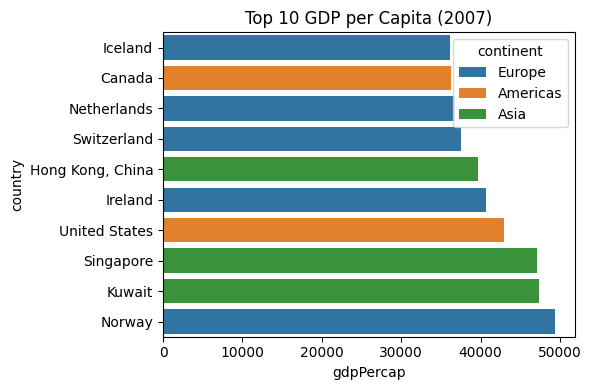

In [21]:

import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.barplot(y='country', x='gdpPercap', hue='continent', data=top10_2007, dodge=False)
plt.title('Top 10 GDP per Capita (2007)')
plt.tight_layout()
plt.show()

### 8) Challenges 2
- A scatterplot of GDP per capita vs. life expectancy using plotly
- Encode continent as color and year as an animation frame.
- What does each encoding reveal?
- Which encoding is most effective at showing inequality?
- How does animation enhance or hinder interpretation?



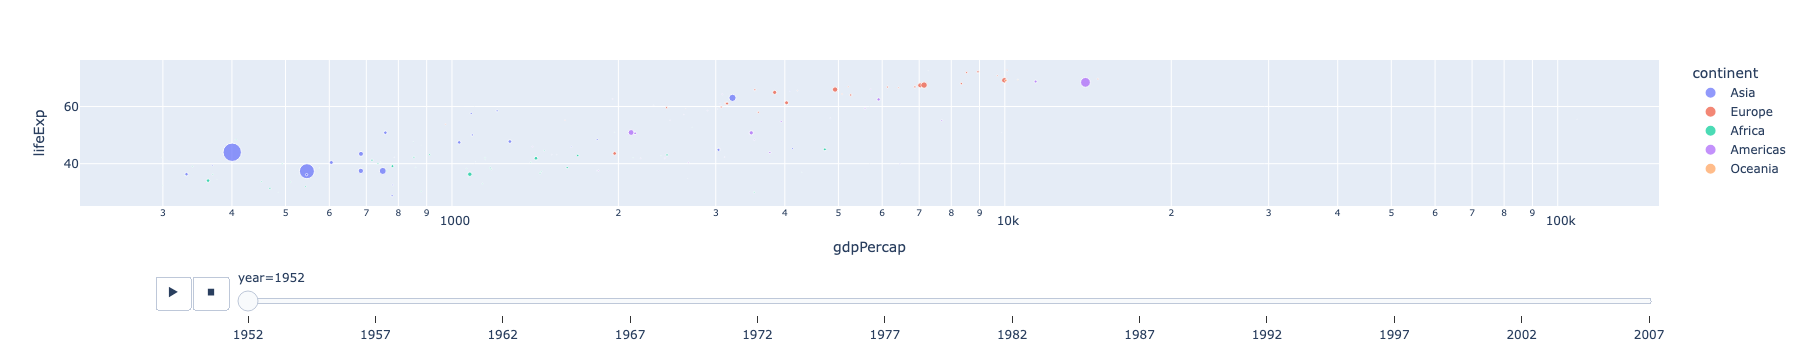

In [22]:
import plotly.express as px
gap = px.data.gapminder()
px.scatter(
gap, x="gdpPercap", y="lifeExp",
color="continent", size="pop",
hover_name="country", animation_frame="year",
log_x=True
)